In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.8.2
TFP version: 0.16.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [ ]:
# Define base distribution
normal = tfd.Normal(loc = 0, scale = 1.)


In [ ]:
# Sample from base distribution
n = 1000
z = normal.sample(n)


### Scale and shift bijector

In [ ]:
# Define scale and shift

scale = 4.5
shift = 7

In [ ]:
# Define chain bijector

scale_and_shift = tfb.Chain([tfb.Shift(shift),tfb.Scale(scale)])

In [ ]:
# We can also use call methods

scale_tranf = tfb.Scale(scale)
shift_tranf = tfb.Shift(shift)
scale_and_shift = shift_tranf(scale_tranf) 

In [ ]:
# Apply the forward transformation
x = scale_and_shift.forward(z)


In [ ]:
# Check the forward transformation

tf.norm(x-(scale*z-shift))

<tf.Tensor: shape=(), dtype=float32, numpy=442.71887>

#### Plots

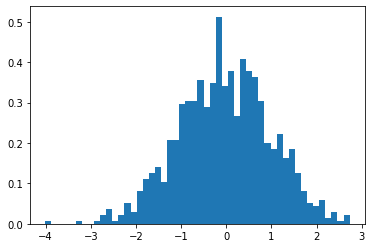

In [ ]:
# Plot z density

plt.hist(z,bins = 50, density = True)
plt.show()

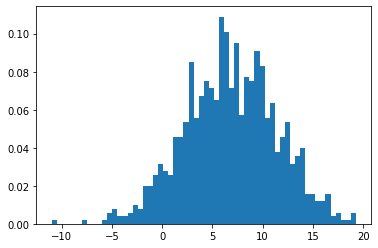

In [ ]:
# Plot x density
plt.hist(x, bins = 60,density = True)
plt.show()

#### Inverse transformation

In [ ]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(x)

In [ ]:
# Check inverse transformation

tf.norm(inv_x-z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [ ]:
# Compute log prob for x

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z,event_ndims = 0)
log_prob_x

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ -2.4313972,  -2.451502 ,  -3.1412172,  -3.6754045,  -2.554174 ,
        -3.1141634,  -3.157748 ,  -2.737832 ,  -2.6121738,  -2.4562333,
        -2.4275227,  -4.3900843,  -2.4803362,  -2.6986356,  -2.4894338,
        -6.0509963,  -3.5744894,  -2.4653723,  -2.7489066,  -4.38476  ,
        -3.4173717,  -2.4581258,  -2.423501 ,  -3.2237706,  -2.474238 ,
        -4.745294 ,  -2.4642758,  -2.779081 ,  -3.5726547,  -2.7243383,
        -5.3665347,  -3.872519 ,  -2.8859158,  -2.6618605,  -2.483903 ,
        -3.8431487,  -2.4319077,  -3.265283 ,  -2.4234934,  -2.4793773,
        -2.6276627,  -2.5541234,  -5.9510436,  -3.369236 ,  -4.1232395,
        -2.4230168,  -3.5857816,  -4.1755037,  -2.4255745,  -5.8927646,
        -2.4252715,  -2.6103055,  -3.164163 ,  -4.5772333,  -2.429932 ,
        -2.4762652,  -2.5977235,  -2.4339347,  -3.3667984,  -3.227292 ,
        -3.5451453,  -2.9357142,  -2.6824894,  -2.6716356,  -3.0825257,
        -3.3791

In [ ]:
# We can also use the inverse transformation

log_prob_x = (normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x,event_ndims=0))
log_prob_x

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ -2.4313972,  -2.451502 ,  -3.1412172,  -3.6754045,  -2.554174 ,
        -3.1141634,  -3.157748 ,  -2.737832 ,  -2.6121738,  -2.4562333,
        -2.4275227,  -4.3900843,  -2.4803362,  -2.6986356,  -2.4894338,
        -6.0509963,  -3.5744894,  -2.4653723,  -2.7489066,  -4.38476  ,
        -3.4173717,  -2.4581258,  -2.423501 ,  -3.2237706,  -2.474238 ,
        -4.745294 ,  -2.4642758,  -2.779081 ,  -3.5726547,  -2.7243383,
        -5.3665347,  -3.872519 ,  -2.8859158,  -2.6618605,  -2.483903 ,
        -3.8431487,  -2.4319077,  -3.265283 ,  -2.4234934,  -2.4793773,
        -2.6276627,  -2.5541234,  -5.9510436,  -3.369236 ,  -4.1232395,
        -2.4230168,  -3.5857816,  -4.1755037,  -2.4255745,  -5.8927646,
        -2.4252715,  -2.6103055,  -3.164163 ,  -4.5772333,  -2.429932 ,
        -2.4762652,  -2.5977235,  -2.4339347,  -3.3667984,  -3.227292 ,
        -3.5451453,  -2.9357142,  -2.6824894,  -2.6716356,  -3.0825257,
        -3.3791

### Broadcasting

In [ ]:
x = tf.random.normal(shape=(100, 1))

In [ ]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature = 0.01)
y = softfloor.forward(x)
y.shape

TensorShape([100, 1])

In [ ]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature = [0.2,1.0])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


In [ ]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature = [0.01,0.1,1.0])

In [ ]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

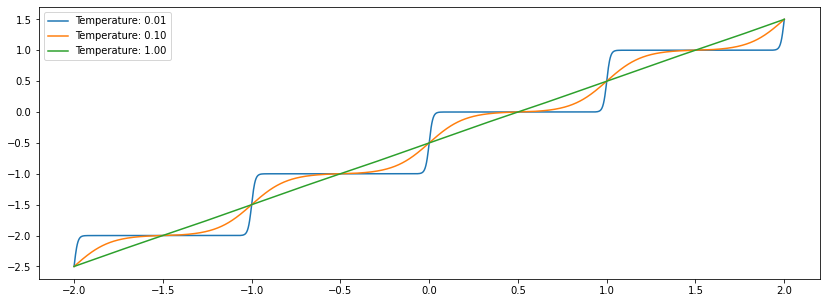

In [ ]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3,softfloor,["temperature"],x)

In [ ]:
# Gumbel bijector using broadcasting
exps = tfb.GumbelCDF(loc = [0.5,1,1.5,2,3],scale = [1,2,2,3,4])


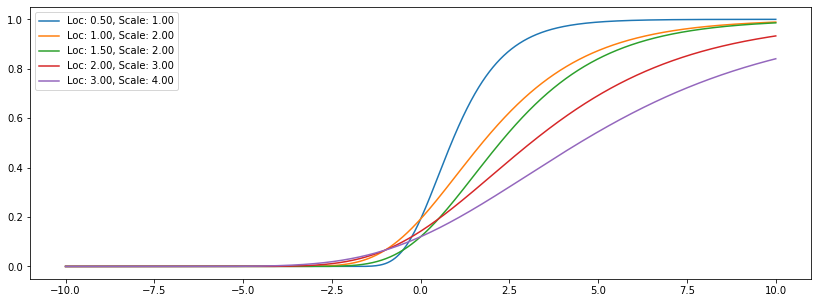

In [ ]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5,exps,["loc","scale"],x)


***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [ ]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [ ]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [ ]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Exponential bijector
exp = tfb.Exp()


In [ ]:
# Log normal transformed distribution using exp and normal bijectors

log_normal_td = exp(normal)

In [ ]:
# Display event and batch shape
print('batch_shape: ', log_normal_td.batch_shape)
print('batch_shape: ', log_normal_td.event_shape)


batch_shape:  ()
batch_shape:  ()


In [ ]:
# Base distribution
z = normal.sample(n)


#### Plots

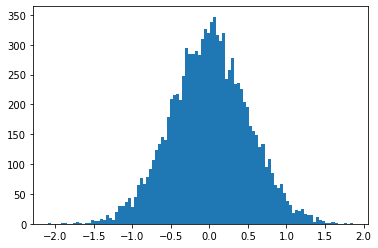

In [ ]:
# Plot z density

plt.hist(z,bins = 100,density = False)
plt.show()

In [ ]:
# Transformed distribution

x =  log_normal_td.sample(n)

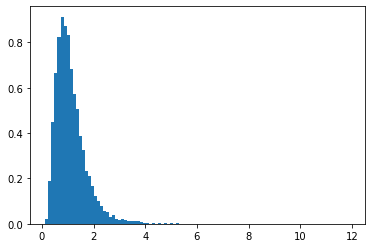

In [ ]:
# Plot x density

plt.hist(x,bins = 100,density = True)
plt.show()

In [ ]:
# Define log normal distribution

log_normal = tfd.LogNormal(loc = loc,scale = scale)

In [ ]:
# Sample log_normal

l = log_normal.sample(n)


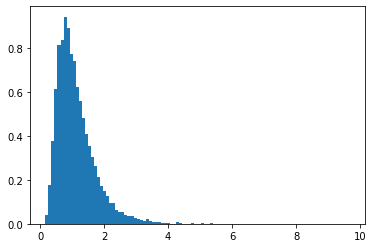

In [ ]:
# Plot l density

plt.hist(l,bins = 100, density = True)
plt.show()

#### Log probability

In [ ]:
# Log prob of LogNormal
log_prob = log_normal.log_prob(x)


In [ ]:
# Log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(x)

In [ ]:
# Check log probs
tf.norm(log_prob-log_prob_td)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

### Event shape and batch shape

In [ ]:
# Set a scaling lower triangular matrix

trill = tf.random.normal((2,4,4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(trill)

In [ ]:
# View of scale_low_tri
scale_low_tri.to_dense()


<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 0.07305935,  0.        ,  0.        ,  0.        ],
        [ 0.444393  ,  0.411897  ,  0.        ,  0.        ],
        [-0.08424646,  0.3865127 , -0.5089124 ,  0.        ],
        [ 2.1299431 , -0.48570386, -1.5687943 , -1.3045237 ]],

       [[-0.19566885,  0.        ,  0.        ,  0.        ],
        [-0.5555295 ,  2.117247  ,  0.        ,  0.        ],
        [-0.689849  ,  0.4902457 , -1.0896817 ,  0.        ],
        [-0.3874665 , -2.5636961 , -0.17641893, -1.3139085 ]]],
      dtype=float32)>

In [ ]:
# Define scale linear operator
scale_line_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)


In [ ]:
# Define scale linear operator transformed distribution with a batch and event shape

mvn = tfd.TransformedDistribution(
  tfd.Sample(
    tfd.Normal(loc=0., scale=1.),
    sample_shape=[4]),
  tfb.ScaleMatvecTriL(scale_tril=scale_low_tri)
)
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_trilSampleNormal", batch_shape=[], event_shape=[4], dtype=float32)


In [ ]:
# Display event and batch shape

print(mvn.batch_shape,mvn.event_shape)

() (4,)


In [ ]:
# Sample



In [ ]:
# Define a MultivariateNormalLinearOperator distribution



In [ ]:
# Display event and batch shape



In [ ]:
# Sample



In [ ]:
# Check



***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [ ]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
        
    def _forward(self,x):
      x = tf.cast(x,tf.float32)
      return tf.squeeze(tf.pow(self.a*x+self.b,3))


    def _inverse(self,y):
      y = tf.cast(y,tf.float32)
      return (tf.math.sign(y)*tf.pow(tf.abs(y),1/3)-self.b)/self.a
    def _forward_log_det_jacobian(self,x):
      y = tf.cast(x,tf.float32)
      return tf.math.log(3.*tf.abs(self.a))+2.*tf.math.log(tf.abs(self.a*x+self.b))

In [ ]:
# Cubic bijector
cubic = Cubic([-1.0,2.0],[-1.0,0.4],validate_args = True)


In [ ]:
# Apply forward transformation
x=tf.constant([[1,2],[3,4]])
y = cubic.forward(x)

In [ ]:
# Check inverse

np.linalg.norm(x-cubic.inverse(y))

0.0

#### Function plots

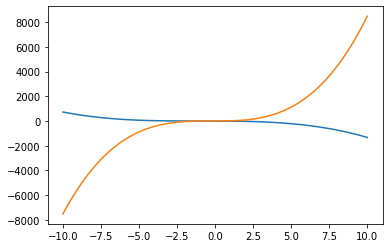

In [ ]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x,cubic.forward(x))

In [ ]:
# Display shape
print(cubic.forward(x).shape)


(500, 2)


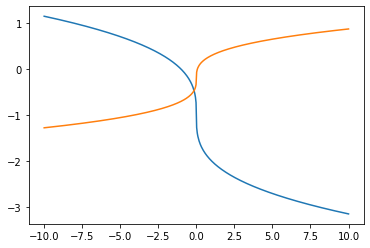

In [ ]:
# Plot the inverse

plt.plot(x,cubic.inverse(x))

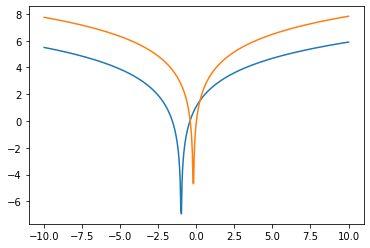

In [ ]:
# Plot the forward log Jacobian determinant
x = tf.cast(x,tf.float32)
plt.plot(x,cubic.forward_log_det_jacobian(x,event_ndims=0))

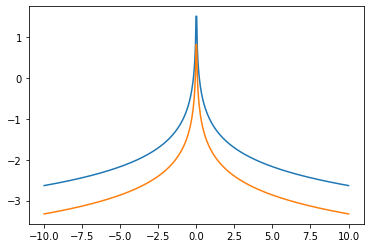

In [ ]:
# Plot the inverse log Jacobian determinant

plt.plot(x,cubic.inverse_log_det_jacobian(x,event_ndims=0))

#### TransformedDistribution and plots

In [ ]:
# Create a transformed distribution with Cubic

normal = tfd.Normal(loc = 0, scale = 1)
cubed_normal = tfd.TransformedDistribution(normal,cubic)

In [ ]:
# Sample cubed_normal

n = 100
g = cubed_normal.sample(n)
g.shape

InvalidArgumentError: ignored

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

In [ ]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Create a transformed distribution with the inverse of Cube



In [ ]:
# Samble inv_cubed_normal



In [ ]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [ ]:
# Create a mixture of four Gaussians



In [ ]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

In [ ]:
# Plot the data distribution



In [ ]:
# Make a trainable bijector



In [ ]:
# Make a trainable transformed distribution



In [ ]:
# Plot the data and learned distributions



In [ ]:
# Train the bijector

num_epochs = 10
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

In [ ]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [ ]:
# Plot the data and learned distributions



In [ ]:
# Display trainable variables



***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [ ]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(-2.0, 2.0)

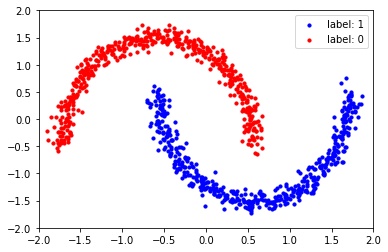

In [ ]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [ ]:
# Define base distribution

base_distribution = tfd.Normal(loc = 0, scale = 1)

In [ ]:
# Define the trainable distribution



In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

In [ ]:
# Plot contour



In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [ ]:
# Make samples



In [ ]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

In [ ]:
# Plot



#### Training a MaskedAutoregressiveFlow bijector

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

In [ ]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [ ]:
# Train the distribution



In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [ ]:
# Make samples



In [ ]:
# Plot



In [ ]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

In [ ]:
# Plot contour



#### Training a chain of MaskedAutoregressiveFlow bijectors

In [ ]:
# Define a more expressive model



In [ ]:
# Define the trainable distribution



In [ ]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

In [ ]:
# Plot



In [ ]:
# Plot



In [ ]:
# Train the distribution



In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [ ]:
# Make samples and plot



In [ ]:
# Plot



In [ ]:
# Plot

